# TP Clustering - Partie 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster


## Méthode K-Means

In [2]:
from scipy.io import arff

def data_as_np(path):
    databrut = arff.loadarff(open(path,"r"))
    data = [[x[0], x[1]] for x in databrut[0]]
    return data

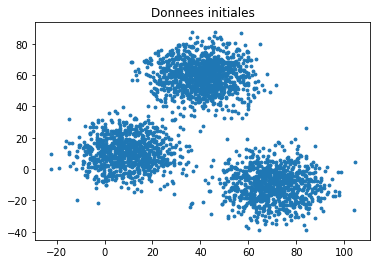

In [22]:
datanp = data_as_np("./artificial/xclara.arff")

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

Exemple avec 3 clusters :

ValueError: 'c' argument has 3000 elements, which is not acceptable for use with 'x' with size 1000, 'y' with size 1000.

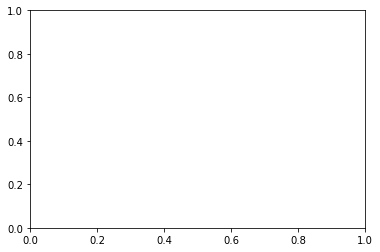

In [57]:
datanp = data_as_np("./artificial/xclara.arff")
def kmean(k,datanp):
    tps1 = time.time()
    model = cluster.KMeans(n_clusters = k, init = 'k-means++')
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration

k=3
labels,tps1,tps2,iteration = kmean(k,datanp)
labelsKMean = labels
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

### Calcul de silhouette

In [30]:
#Creation d'un graphique
def graph(l,name):
    plt.bar([i for i in range(2,len(l)+2)],l) 
    plt.title('Indice de '+name)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

In [57]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

sil_score_list = []
dv_score_list = []
ch_score_list = []

# Calcul des métriques
datanp=data_as_np("./artificial/xclara.arff")
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
[1 1 1 ... 0 0 0]
Training 3 cluster algo...
[2 2 2 ... 0 0 0]
Training 4 cluster algo...
[2 2 2 ... 1 1 1]
Training 5 cluster algo...
[2 2 2 ... 4 0 0]
Training 6 cluster algo...
[5 2 5 ... 3 1 3]
Training 7 cluster algo...
[6 1 6 ... 3 2 2]
Training 8 cluster algo...
[6 2 6 ... 0 3 0]
Runtime =  1705.23  ms



Silhouette SCORE :


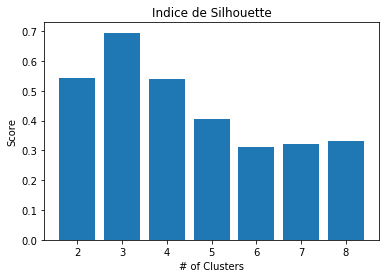

Nombre clusters =  3

Davies-Bouldin SCORE :


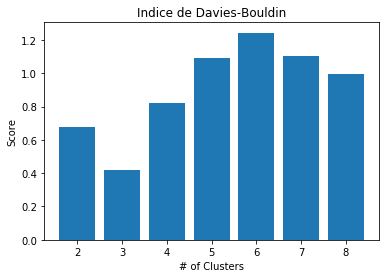

Nombre clusters =  3

Calinski-Harabasz SCORE :


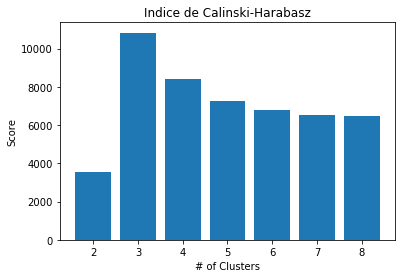

Nombre clusters =  3


In [29]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

Le calcul des métriques nous indique que le nombre optimal de cluster est de 3

### Limites de K-Means

Pour les jeux de données en spiral, en rings et en smile, la méthode k-means va avoir du mal a déterminer les clusters :

SPIRAL :

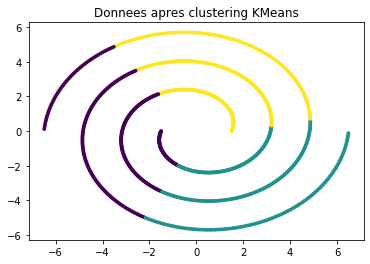

nb clusters =  3 , nb iter =  6 , runtime =  51.41  ms


In [31]:
# Appel de kmeans
datanp=data_as_np("./artificial/spiral.arff")
k=3
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

In [32]:
# Itération et calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
    dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
    ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print()
print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Runtime =  1693.01  ms



Silhouette SCORE :


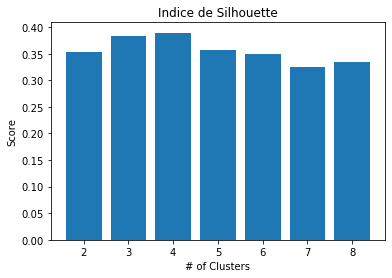

Nombre clusters =  4

Davies-Bouldin SCORE :


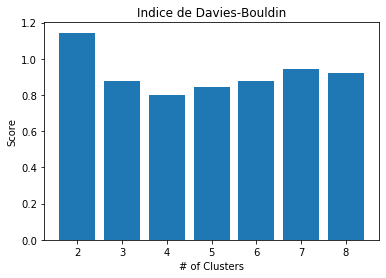

Nombre clusters =  4

Calinski-Harabasz SCORE :


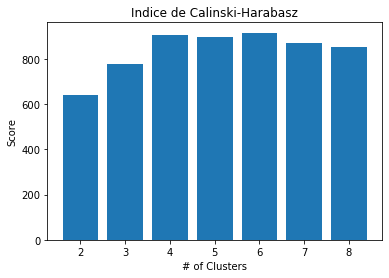

Nombre clusters =  6


In [33]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

RINGS

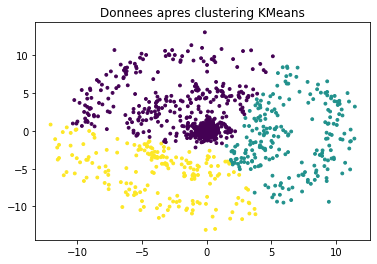

nb clusters =  3 , nb iter =  6 , runtime =  78.77  ms


In [36]:
# Appel de kmeans
datanp=data_as_np("./artificial/rings.arff")
k=3
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

SMILE1

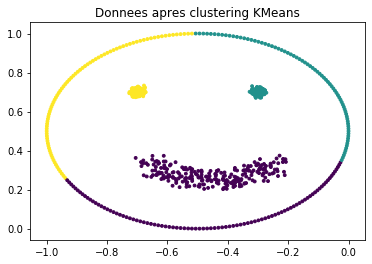

nb clusters =  3 , nb iter =  5 , runtime =  57.58  ms


In [39]:
# Appel de kmeans
datanp=data_as_np("./artificial/smile1.arff")
k=3
labels,tps1,tps2,iteration = kmean(k,datanp)

f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

## Méthode K-Medoids

On reprend le dataset initial

In [73]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

def kmedoid(k,data):
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix,k) #Utilisation de l'algo FasterPAM
    iter_kmed=fp.n_iter
    labels_kmed = fp.labels
    return labels_kmed, tps1, tps2, iter_kmed

In [41]:
# Itération et calcul des métriques
sil_score_list = []
dv_score_list = []
ch_score_list = []

datanp=data_as_np("./artificial/xclara.arff")
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    labels = kmedoid(i,datanp)[0]
    sil_score = silhouette_score(np.array(datanp),labels)
    dv_score  = davies_bouldin_score(np.array(datanp),labels)
    ch_score  = calinski_harabasz_score(np.array(datanp),labels)
    sil_score_list.append(sil_score)
    dv_score_list.append(dv_score)
    ch_score_list.append(ch_score)
tps2 = time.time()

print()
print("Runtime = ",round((tps2-tps1)*1000,2)," ms")

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Runtime =  3179.39  ms



Silhouette SCORE :


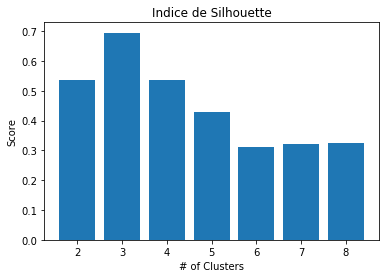

Nombre clusters =  3

Davies-Bouldin SCORE :


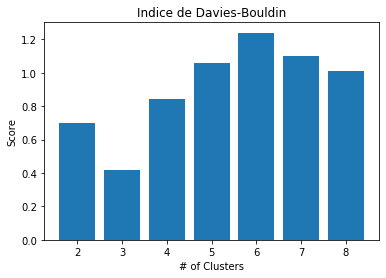

Nombre clusters =  3

Calinski-Harabasz SCORE :


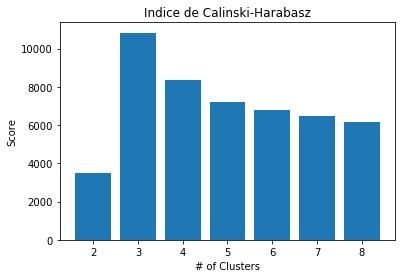

Nombre clusters =  3


In [42]:
#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")
nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
indexMax = sil_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Davies-Bouldin
print()
print("Davies-Bouldin SCORE :")
graph(dv_score_list, "Davies-Bouldin")
nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
indexMax = dv_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

#Courbe Calinski-Harabasz
print()
print("Calinski-Harabasz SCORE :")
graph(ch_score_list, "Calinski-Harabasz")
nbMax = np.max(ch_score_list)# Le score est le maximum
indexMax = ch_score_list.index(nbMax) + min_cluster
print("Nombre clusters = ",indexMax)

### Métriques du package kmedoids

In [43]:
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score

print(rand_score(labelsKMean,labelsKMedoids))
print(mutual_info_score(labelsKMean,labelsKMedoids))

NameError: name 'labelsKMedoids' is not defined

# Clustering agglomératif

In [15]:
import scipy.cluster.hierarchy as shc

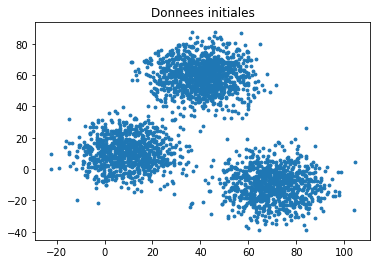

Dendrogramme 'single' donnees initiales


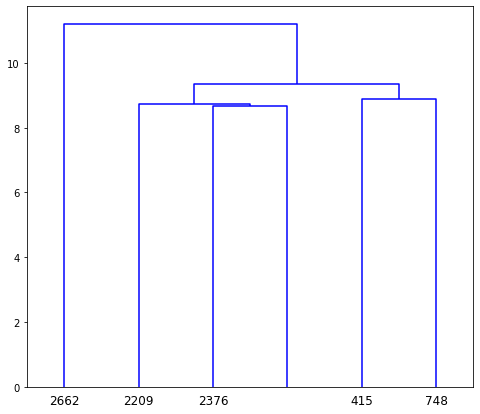

In [12]:
datanp=data_as_np("./artificial/xclara.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Donnees dans datanp
print("Dendrogramme 'single' donnees initiales")

linked_mat = shc.linkage(datanp,'single')
plt.figure(figsize=(8,7))
shc.dendrogram(linked_mat, p=3,truncate_mode="level", orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

In [43]:
def cluster_agglo(distance_treshold,linkage, nb_cluster):
    tps1=time.time()
    model=cluster.AgglomerativeClustering(distance_threshold=distance_treshold, linkage=linkage, n_clusters=nb_cluster)
    model=model.fit(datanp)
    tps2=time.time()
    runtime=round((tps2-tps1)*1000,2)
    return model, runtime

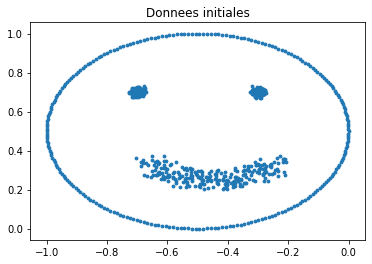

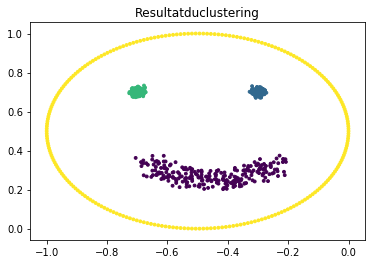

nbclusters= 4 ,nbfeuilles= 1000 runtime= 11.85 ms


In [44]:
datanp=data_as_np("./artificial/smile1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Affichage clustering
model, runtime = cluster_agglo(None,'single',4)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultatduclustering")
plt.show()
print("nbclusters=",model.n_clusters_,",nbfeuilles=",model.n_leaves_,"runtime=",runtime,"ms")

On fait varier la distance treshold pour trouver l'optimale


Silhouette SCORE :


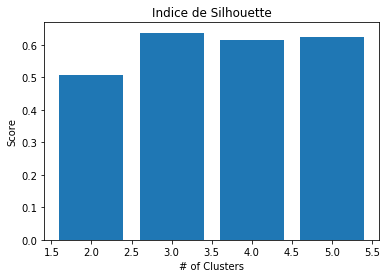


Runtime:


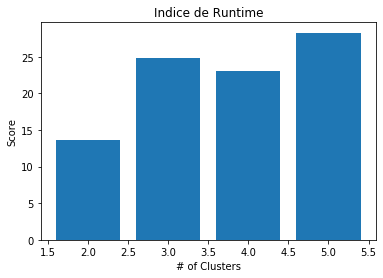

In [45]:
# Différents liens
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

sil_score_list = []
runtime_list = []

for i in ['single', 'average', 'complete', 'ward']:
    model, runtime=cluster_agglo(None, i, 4)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    runtime_list.append(runtime)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")


print()
print("Runtime:")
graph(runtime_list, "Runtime")

Le meilleur des liens semble être average, à la fois en précision et en durée d'exécution

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Silhouette SCORE :


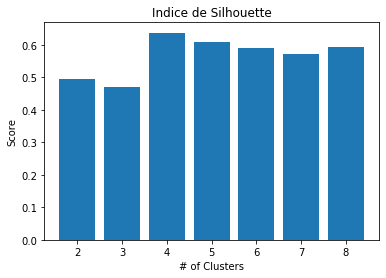

In [41]:
# Différents k
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

sil_score_list = []
runtime_list = []

min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime=cluster_agglo(None, 'average', i)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)
    runtime_list.append(runtime)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

### Limites de la méthode

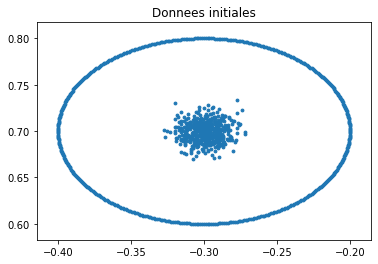

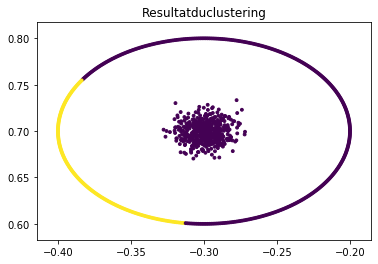

nbclusters= 2 ,nbfeuilles= 1000 runtime= 20.89 ms
Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...

Silhouette SCORE :


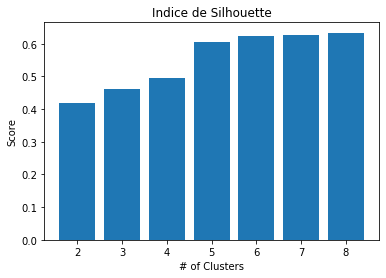

In [55]:
datanp=data_as_np("./artificial/donut1.arff")

# Affichage données
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

#Affichage clustering
model, runtime = cluster_agglo(None,'average',2)
plt.scatter(f0,f1,c=model.labels_,s=8)
plt.title("Resultatduclustering")
plt.show()
print("nbclusters=",model.n_clusters_,",nbfeuilles=",model.n_leaves_,"runtime=",runtime,"ms")

sil_score_list = []

min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    model, runtime=cluster_agglo(None, 'average', i)
    model=model.fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)

#Courbe silhouette
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

### Comparaison des méthodes


Silhouette SCORE :


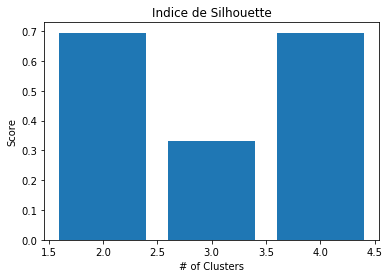


Runtime:


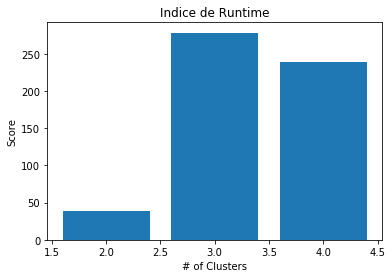

In [80]:
datanp=data_as_np("./artificial/xclara.arff")

sil_score_list = []
runtime_list = []

# Calcul avec chacune des méthodes
#kmeans
tps1 = time.time()
labels_kmean = kmean(3, datanp)[0]
tps2 = time.time()
sil_score = silhouette_score(np.array(datanp),labels_kmean)
sil_score_list.append(sil_score)
runtime_list.append(round((tps2-tps1)*1000,2))

#kmedoids
tps1 = time.time()
labels_kmedoids = kmedoid(i,datanp)[0]
tps2 = time.time()
sil_score = silhouette_score(np.array(datanp),labels_kmedoids)
sil_score_list.append(sil_score)
runtime_list.append(round((tps2-tps1)*1000,2))

#cluster agglomeratif
model, runtime=cluster_agglo(None, 'average', 3)
model=model.fit(datanp)
labels_cluster_agglo = model.labels_
sil_score = silhouette_score(np.array(datanp),labels_cluster_agglo)
sil_score_list.append(sil_score)
runtime_list.append(runtime)

# Comparaison des silhouette score
print()
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

# Comparaison des temps d'exécution
print()
print("Runtime:")
graph(runtime_list, "Runtime")

La meilleure des méthodes pour ce set de données semble être kmeans

In [82]:
# Indice de rand
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score

print(rand_score(labels_kmean,labels_cluster_agglo))
print(rand_score(labels_kmedoids,labels_cluster_agglo))

#print(mutual_info_score(labelsKMean,labelsKMedoids))

0.9964517061242636
0.7893046571079249


## Clustering DBSCAN et HDBSCAN

In [86]:
from sklearn.cluster import DBSCAN

Silhouette SCORE :


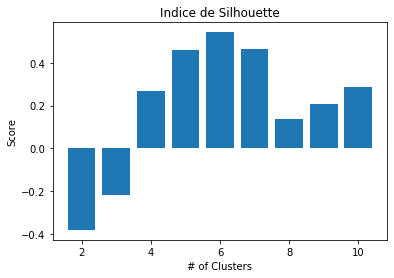

In [116]:
#Affichage clustering
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

sil_score_list = []

for i in range(1, 10):
    model = DBSCAN(eps=i, min_samples=5).fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)

# Comparaison des silhouette score
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

Silhouette SCORE :


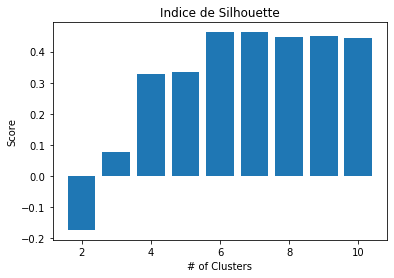

In [117]:
#Affichage clustering
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

sil_score_list = []

for i in range(1, 10):
    model = DBSCAN(eps=6, min_samples=i).fit(datanp)
    sil_score = silhouette_score(np.array(datanp),model.labels_)
    sil_score_list.append(sil_score)

# Comparaison des silhouette score
print("Silhouette SCORE :")
graph(sil_score_list, "Silhouette")

Les deux meilleures valeurs pour ce dataset sont eps=6, minimum de samples=6

In [ ]:
# Distances k plus proches voisins
# Donnees dans X
k = 5
neigh = NearestNeighbors ( n_neighbors = k )
neigh . fit ( X )
distances , indices = neigh . kneighbors ( X )
# retirer le point " origine "
newDistances = np . asarray ( [ np . average ( distances [ i ] [ 1 : ] ) for i in range (0 ,
distances . shape [ 0 ] ) ] )
trie = np . sort ( newDistances )
plt . title ( " Plus proches voisins ( 5 ) " )
plt . plot ( trie ) ;
plt . show ()